In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib 
#from sklearn.linear_model import LinearRegression as lr
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

In [2]:
trainData = pd.read_csv("../Data/train.csv", index_col = 0)
testData = pd.read_csv("../Data/test.csv", index_col = 0)

In [3]:
print(trainData.head())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [4]:
xTrain = trainData[["Pclass", "SibSp", "Parch", "Fare"]]
yTrain = trainData["Survived"]
xTest = testData[["Pclass", "SibSp", "Parch", "Fare"]]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(xTrain,yTrain, test_size = 0.4) 

In [14]:
scores = []
for k in range(1, 150):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

0.6750700280112045 125
0.6750700280112045 126
0.6694677871148459 127
0.6722689075630253 128
0.6722689075630253 129
0.6722689075630253 130
0.6694677871148459 131
0.6722689075630253 132
0.6862745098039216 133
0.6778711484593838 134
0.6778711484593838 135
0.6918767507002801 136
0.680672268907563 137
0.6890756302521008 138
0.6918767507002801 139
0.6862745098039216 140
0.6946778711484594 141
0.6862745098039216 142
0.6918767507002801 143
0.6862745098039216 144
0.6918767507002801 145
0.6918767507002801 146
0.6946778711484594 147
0.6918767507002801 148
0.6890756302521008 149


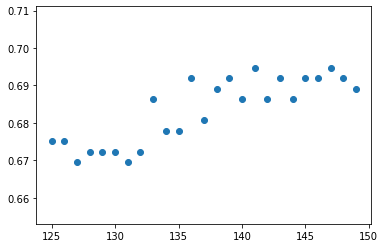

In [15]:
%matplotlib inline
for i in range(len(scores)):
    print(scores[i],i)
plt.scatter(list(range(1,150)), scores)

In [16]:
# from sklearn import KFold
# kf = KFold(n_split = 5,shuffle = false).split(range(891))
scores = []
from sklearn.model_selection import cross_val_score
for k in range(150):
    knn = KNeighborsClassifier(n_neighbors = k)
    kscores = cross_val_score(knn,xTrain,cv = 10,scoring = "accuracy")
    scores.append(kscores.mean())
plt.scatter(list(range(1,150)),kscores)

C:\Users\Ofir\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


TypeError: fit() missing 1 required positional argument: 'y'